<a href="https://colab.research.google.com/github/anxiush/IBM-AI-Project/blob/main/AI_PROJECT_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json from your Kaggle account


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"anush1231","key":"7726399d13b7616052b82bf7c87f2845"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install -q kaggle
!kaggle datasets download -d tongpython/cat-and-dog
!unzip -q cat-and-dog.zip -d cat_and_dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)
replace cat_and_dog/test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os

for root, dirs, files in os.walk("cat_and_dog"):
    for name in dirs:
        print("📁", os.path.join(root, name))
    break


📁 cat_and_dog/test_set
📁 cat_and_dog/training_set


In [ ]:
import os, shutil
import random

cat_src = "cat_and_dog/training_set/training_set/cats"
dog_src = "cat_and_dog/training_set/training_set/dogs"

# Output folders
train_dir = "data/train"
val_dir = "data/val"

for folder in [train_dir, val_dir]:
    os.makedirs(os.path.join(folder, "cats"), exist_ok=True)
    os.makedirs(os.path.join(folder, "dogs"), exist_ok=True)

# Load and shuffle
cat_files = os.listdir(cat_src)
dog_files = os.listdir(dog_src)
random.shuffle(cat_files)
random.shuffle(dog_files)

# 80/20 split
split_cat = int(0.8 * len(cat_files))
split_dog = int(0.8 * len(dog_files))

# Copy cat images
for i, fname in enumerate(cat_files):
    src = os.path.join(cat_src, fname)
    dest = os.path.join(train_dir if i < split_cat else val_dir, "cats", fname)
    shutil.copy(src, dest)

# Copy dog images
for i, fname in enumerate(dog_files):
    src = os.path.join(dog_src, fname)
    dest = os.path.join(train_dir if i < split_dog else val_dir, "dogs", fname)
    shutil.copy(src, dest)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (150, 150)
batch_size = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    train_dir, target_size=img_size,
    batch_size=batch_size, class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=img_size,
    batch_size=batch_size, class_mode='binary'
)


Found 6402 images belonging to 2 classes.
Found 1603 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=25)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.5192 - loss: 0.7989 - val_accuracy: 0.5839 - val_loss: 0.6692
Epoch 2/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.5754 - loss: 0.6833 - val_accuracy: 0.5533 - val_loss: 0.6793
Epoch 3/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.5767 - loss: 0.6803 - val_accuracy: 0.5858 - val_loss: 0.6700
Epoch 4/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.5753 - loss: 0.6758 - val_accuracy: 0.5696 - val_loss: 0.6770
Epoch 5/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.5911 - loss: 0.6684 - val_accuracy: 0.6089 - val_loss: 0.6602
Epoch 6/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.5969 - loss: 0.6667 - val_accuracy: 0.6450 - val_loss: 0.6315
Epoch 7/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.6228 - loss: 0.6503 - val_accuracy: 0.6650 - val_loss: 0.6200
Epoch 8/25
201/201 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.6342 - loss: 0.6416 - val_accu

In [ ]:
import keras
keras.saving.save_model(model, "cat_dog_model.keras")


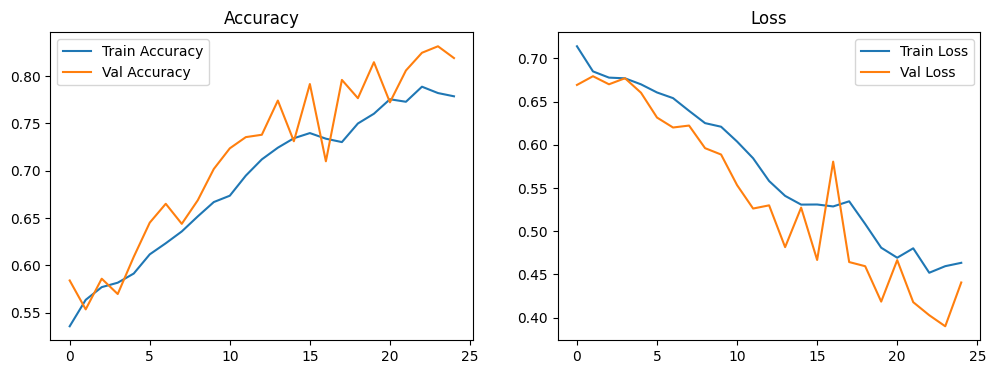

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Val Accuracy')
plt.legend(); plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.legend(); plt.title('Loss')

plt.show()


In [ ]:
import requests
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

def predict_image_from_url(url):
    try:
        response = requests.get(url)
        img = Image.open(io.BytesIO(response.content)).convert('RGB').resize((150, 150))
        arr = np.expand_dims(np.array(img) / 255.0, axis=0)
        pred = model.predict(arr)[0][0]
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Confidence: {pred:.4f}")
        plt.show()
        print("🐶 Dog" if pred > 0.5 else "🐱 Cat")
    except Exception as e:
        print("⚠️ Could not load image:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


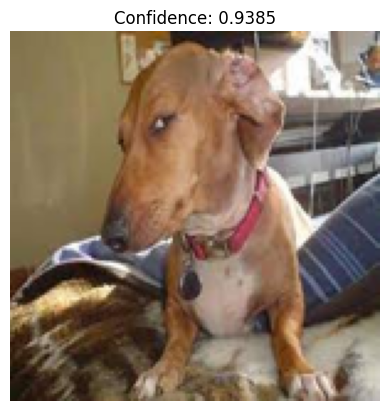

🐶 Dog


In [ ]:
predict_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToElCOvjnGOiQvEWDQJTd_uzac6oYtXtX9Y75LBt21wLjHsQiSZH1z_0438cWTE10AWIc&usqp=CAU")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


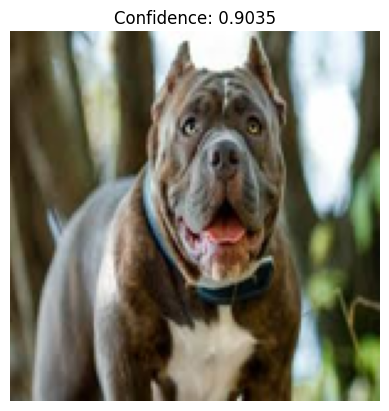

🐶 Dog


In [ ]:
predict_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgL8Hk4qSVC9vrpV6-0BwIIVmtjdT1OmBEHw&s")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


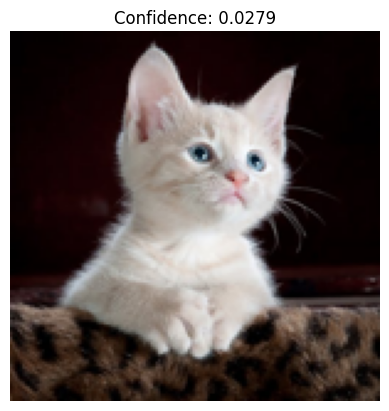

🐱 Cat


In [ ]:
predict_image_from_url("https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


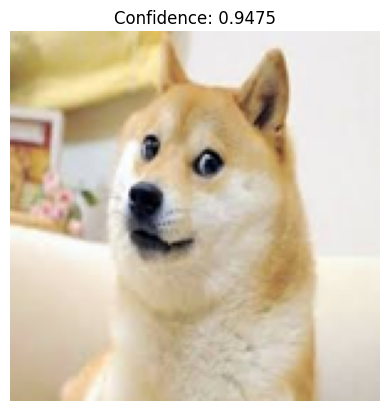

🐶 Dog


In [ ]:
predict_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeP835chGu_jniJSyXHpvjUR1R2y3tFH461g&s")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


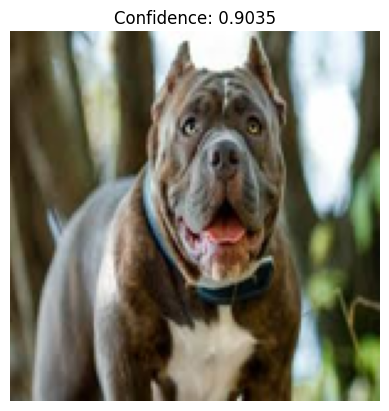

🐶 Dog


In [ ]:
predict_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgL8Hk4qSVC9vrpV6-0BwIIVmtjdT1OmBEHw&s")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


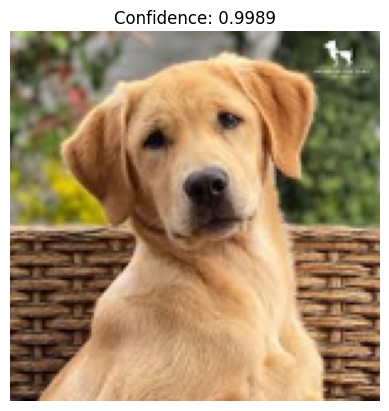

🐶 Dog


In [ ]:
predict_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3bbMc6MZBCw1ZaTyj4y9JzxS8P8ux_ZX93Q&s")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


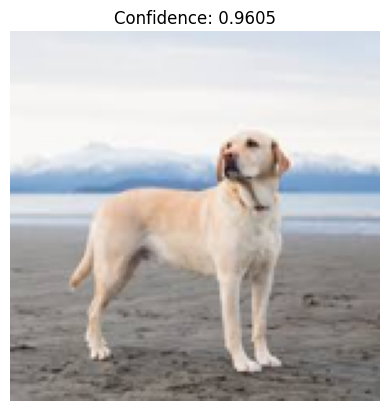

🐶 Dog


In [ ]:
predict_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYG_DpGq8WaZQQLC7Pp1W2sHTXWitrdIQ_Vg&s")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


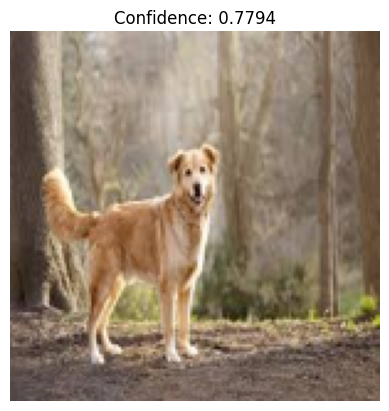

🐶 Dog


In [ ]:
predict_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWaptiU9sSO41l2SDVUIttrXPGvcHsEMCGyQ&s")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


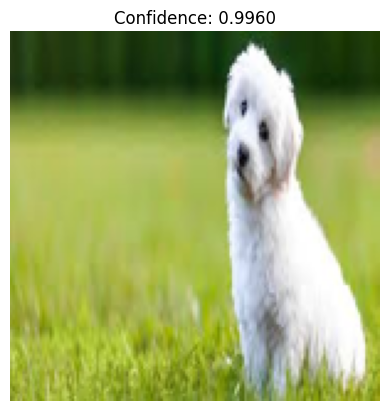

🐶 Dog


In [ ]:
predict_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSqxfTVVwh1IkVw1bgnsZx4ftUAYtiDD4TicQ&s")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


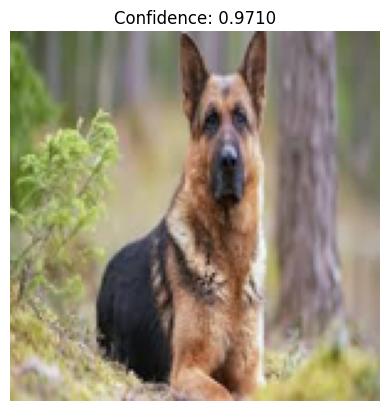

🐶 Dog


In [ ]:
predict_image_from_url ("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrKtQwsepUptSlZ34nV6yR9zQVkTPTcIX60w&s")

In [ ]:
!pip install -q gradio


In [ ]:
import gradio as gr
import tensorflow as tf
from PIL import Image
import numpy as np

# Load model
model = tf.keras.models.load_model("cat_dog_model.keras")

IMG_SIZE = (150, 150)

def classify_image(img):
    img = img.convert("RGB").resize(IMG_SIZE)
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img_array)[0][0]
    return "🐶 Dog" if prediction > 0.5 else "🐱 Cat"


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=1),
    title="🐶 Dog vs Cat 🐱 Classifier",
    description="Upload an image of a cat or dog, and the model will tell you which it is."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c8c32e45a6f191cd77.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
